Step 1. Importing the dependencies 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Step 2. Load the data 

In [59]:
df = pd.read_csv('Amazon Sales data.csv')

In [60]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [61]:
df['Order_Date'] = pd.to_datetime(df['Order Date'])

In [62]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order_Date
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05-28
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012-08-22
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014-05-02
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014-06-20
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013-02-01


In [63]:
df['Ship_Date'] = pd.to_datetime(df['Ship Date'])

In [64]:
df.to_csv('amazon_sales_data.csv',index=False)

In [65]:
#df = df.drop('Order Date',axis=1)
df = df.drop('Ship Date',axis=1)

In [66]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Units Sold', 'Unit Price', 'Unit Cost',
       'Total Revenue', 'Total Cost', 'Total Profit', 'Order_Date',
       'Ship_Date'],
      dtype='object')

In [67]:
df['Total Revenue'].sum()

137348768.31

In [68]:
tr = df.groupby("Country")["Total Revenue"].sum().reset_index()

In [69]:
#print(tr)
tr_5 = tr.sort_values(by='Total Revenue',ascending=False).head(5)

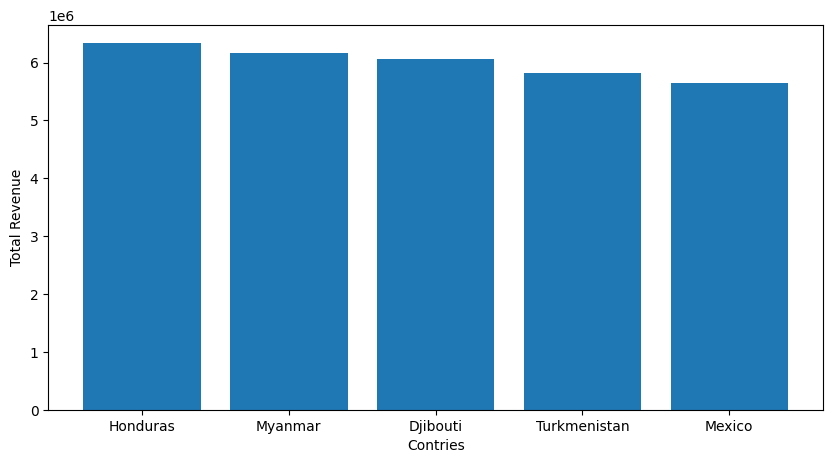

In [70]:
plt.figure(figsize=(10,5))
plt.bar(tr_5['Country'],tr_5['Total Revenue'])
plt.xlabel('Contries')
plt.ylabel('Total Revenue')
plt.show()

In [71]:
tr_5.dtypes

Country           object
Total Revenue    float64
dtype: object

In [72]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month

In [73]:
#Rename the required colums 
#df = df.rename(columns={'Total_revenue':'Total_Revenue'})
df = df.rename(columns={'Total Revenue':'Total_Revenue','Total Cost':'Total_Cost'})

In [74]:
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Units Sold,Unit Price,Unit Cost,Total_Revenue,Total_Cost,Total Profit,Order_Date,Ship_Date,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,9925,255.28,159.42,2533654.0,1582243.50,951410.50,2010-05-28,2010-06-27,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,2804,205.70,117.11,576782.8,328376.44,248406.36,2012-08-22,2012-09-15,2012,8


In [75]:
monthly_revenue = df.groupby(['Year','Month']).agg(Total_Monthly_Revenue=('Total_Revenue','sum'),Total_Monthly_Cost=('Total_Cost','sum')).reset_index()
monthly_revenue.head(2)

,Year,Month,Total_Monthly_Revenue,Total_Monthly_Cost
0,2010,2,3410661.12,1986250.18
1,2010,5,2587973.26,1622531.74


In [76]:
monthly_plot = monthly_revenue.groupby('Year')['Total_Monthly_Revenue'].sum()
monthly_plot

Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total_Monthly_Revenue, dtype: float64

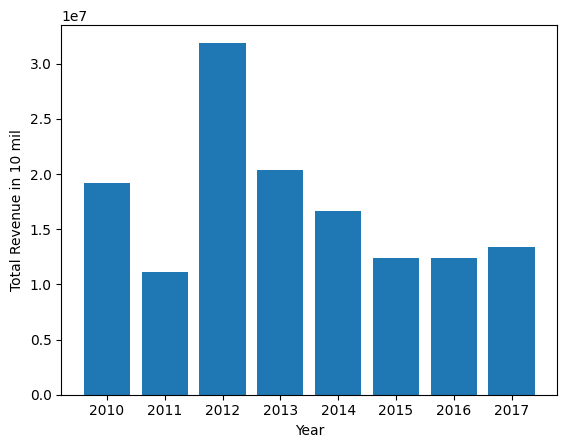

In [77]:
plt.bar(monthly_plot.index,monthly_plot.values)
plt.xlabel('Year')
plt.ylabel('Total Revenue in 10 mil')
plt.show()

<BarContainer object of 60 artists>

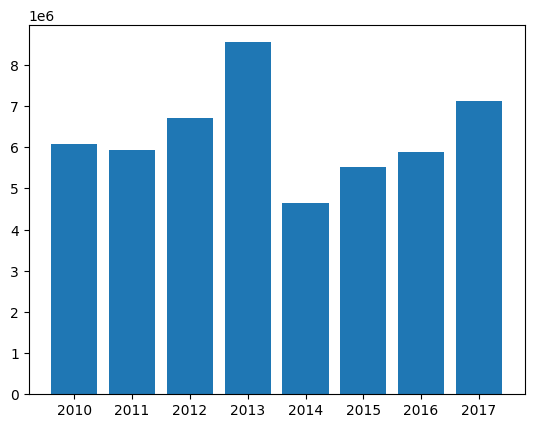

In [78]:
plt.bar(monthly_revenue['Year'],monthly_revenue['Total_Monthly_Revenue'])

In [79]:
monthly_revenue

,Year,Month,Total_Monthly_Revenue,Total_Monthly_Cost
0,2010,2,3410661.12,1986250.18
1,2010,5,2587973.26,1622531.74
2,2010,6,1082418.40,354995.20
3,2010,10,6064933.75,4569540.96
4,2010,11,3458252.00,2082940.30
5,2010,12,2581786.39,1940199.11
6,2011,1,1042225.35,678716.31
7,2011,2,387002.20,259279.24
8,2011,4,2798046.49,2104134.98
9,2011,5,272410.45,182506.39


In [80]:
df.shape

(100, 17)